[dataset](https://www.kaggle.com/c/avazu-ctr-prediction/data)

# Click-Through Rate Prediction

In [1]:
import numpy as np
import random
n = 40428967  #total number of records in the clickstream data 
sample_size = 1000000
skip_values = sorted(random.sample(range(1,n), n-sample_size)) 

types_train = {
    'id': np.dtype(int),
    'click': np.dtype(int),
    'hour': np.dtype(int),
    'C1': np.dtype(int),
    'banner_pos': np.dtype(int),
    'site_id': np.dtype(str),
    'site_domain': np.dtype(str), 
    'site_category': np.dtype(str),
    'app_id': np.dtype(str),
    'app_domain': np.dtype(str),
    'app_category': np.dtype(str),
    'device_id': np.dtype(str),
    'device_ip': np.dtype(str),
    'device_model': np.dtype(str),
    'device_type': np.dtype(int),
    'device_conn_type': np.dtype(int),
    'C14': np.dtype(int),
    'C15': np.dtype(int),
    'C16': np.dtype(int),
    'C17': np.dtype(int),
    'C18': np.dtype(int),
    'C19': np.dtype(int),
    'C20': np.dtype(int),
    'C21':np.dtype(int)
}

types_test = {
    'id': np.dtype(int),
    'hour': np.dtype(int),
    'C1': np.dtype(int),
    'banner_pos': np.dtype(int),
    'site_id': np.dtype(str),
    'site_domain': np.dtype(str), 
    'site_category': np.dtype(str),
    'app_id': np.dtype(str),
    'app_domain': np.dtype(str),
    'app_category': np.dtype(str),
    'device_id': np.dtype(str),
    'device_ip': np.dtype(str),
    'device_model': np.dtype(str),
    'device_type': np.dtype(int),
    'device_conn_type': np.dtype(int),
    'C14': np.dtype(int),
    'C15': np.dtype(int),
    'C16': np.dtype(int),
    'C17': np.dtype(int),
    'C18': np.dtype(int),
    'C19': np.dtype(int),
    'C20': np.dtype(int),
    'C21':np.dtype(int)
}

In [2]:
import pandas as pd
import gzip

parse_date = lambda val : pd.datetime.strptime(val, '%y%m%d%H')

with gzip.open('e:/data/avazu-ctr-prediction/train.gz') as f:
    train = pd.read_csv(f, parse_dates = ['hour'], date_parser = parse_date, dtype=types_train, skiprows = skip_values)

train.head()

,id,click,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,...,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
0,39259272,1,2014-10-21,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,0,15708,320,50,1722,0,35,100084,79
1,1922594537,0,2014-10-21,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,0,15701,320,50,1722,0,35,-1,79
2,886239130,0,2014-10-21,1005,1,e151e245,7e091613,f028772b,ecad2386,7801e8d9,...,1,0,17264,320,50,1872,3,39,-1,23
3,-440361648,0,2014-10-21,1005,1,faf9c1c2,c8223ee3,f028772b,ecad2386,7801e8d9,...,1,0,18993,320,50,2161,0,35,-1,157
4,-1859646727,0,2014-10-21,1005,0,6c5b482c,7687a86e,3e814130,ecad2386,7801e8d9,...,1,0,17654,300,250,1994,2,39,100083,33


In [3]:
train.shape

(1000000, 24)

In [4]:
train.dtypes

id                           int32
click                        int32
hour                datetime64[ns]
C1                           int32
banner_pos                   int32
site_id                     object
site_domain                 object
site_category               object
app_id                      object
app_domain                  object
app_category                object
device_id                   object
device_ip                   object
device_model                object
device_type                  int32
device_conn_type             int32
C14                          int32
C15                          int32
C16                          int32
C17                          int32
C18                          int32
C19                          int32
C20                          int32
C21                          int32
dtype: object

Target feature -> click

site features -> site_id, site_domain, site_category

app feature -> app_id, app_domain, app_category

device feature -> device_id, device_ip, device_model, device_type, device_conn_type

anonymized categorical features -> C14-C21

In [5]:
train['click'].value_counts()

0    829728
1    170272
Name: click, dtype: int64

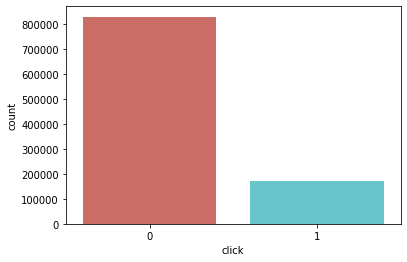

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='click',data=train, palette='hls')

In [7]:
train['click'].value_counts()/len(train)

0    0.829728
1    0.170272
Name: click, dtype: float64

Click through rate is approx. 17%, and approx. 83% is not clicked. 

In [8]:
train.describe(include='all').T

,count,unique,top,freq,first,last,mean,std,min,25%,50%,75%,max
id,1e+06,NaN,NaN,NaN,NaN,NaN,2.86913e+06,1.23933e+09,-2.14748e+09,-1.06909e+09,2.8665e+06,1.07652e+09,2.14748e+09
click,1e+06,NaN,NaN,NaN,NaN,NaN,0.170272,0.375872,0,0,0,0,1
hour,1000000,240,2014-10-22 09:00:00,11210,2014-10-21 00:00:00,2014-10-30 23:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
C1,1e+06,NaN,NaN,NaN,NaN,NaN,1004.97,1.09177,1001,1005,1005,1005,1012
banner_pos,1e+06,NaN,NaN,NaN,NaN,NaN,0.287764,0.503432,0,0,0,1,7
site_id,1000000,2629,85f751fd,360827,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
site_domain,1000000,2858,c4e18dd6,373875,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
site_category,1000000,20,50e219e0,408706,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
app_id,1000000,3182,ecad2386,639173,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
app_domain,1000000,204,7801e8d9,673784,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The data covers 10 days of click streams data from 2014-10-21 to 2014-10-30, that is 240 hours.

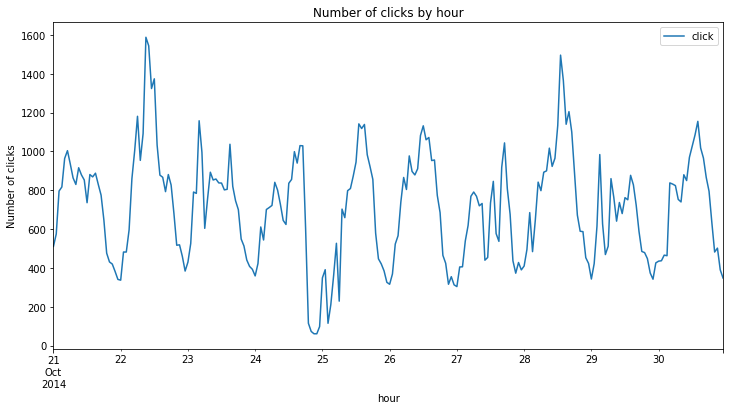

In [9]:
train.groupby('hour').agg({'click':'sum'}).plot(figsize=(12,6))
plt.ylabel('Number of clicks')
plt.title('Number of clicks by hour');

The hourly clicks pattern looks pretty similar every day. However, there were a couple of peak hours, one is sometime in the mid of the day on Oct 22, and another is sometime in the mid of the day on Oct 28. And one off-peak hour is close to mid-night on Oct 24.

###  Feature engineering for date time features

#### Hour

Extract hour from date time feature.

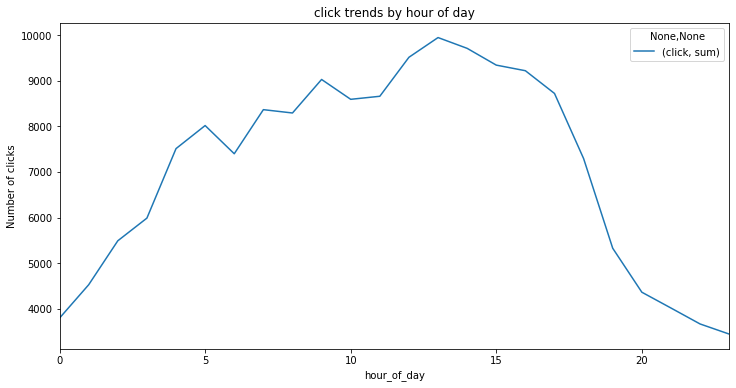

In [10]:
train['hour_of_day'] = train.hour.apply(lambda x: x.hour)
train.groupby('hour_of_day').agg({'click':['sum']}).plot(figsize=(12,6))
plt.ylabel('Number of clicks')
plt.title('click trends by hour of day');

In general, the highest number of clicks is at hour 13 and 14 (1pm and 2pm), and the least number of clicks is at hour 0 (mid-night). It seems a useful feature for roughly estimation.

In [11]:
train.head(3)

,id,click,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,...,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21,hour_of_day
0,39259272,1,2014-10-21,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,0,15708,320,50,1722,0,35,100084,79,0
1,1922594537,0,2014-10-21,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,0,15701,320,50,1722,0,35,-1,79,0
2,886239130,0,2014-10-21,1005,1,e151e245,7e091613,f028772b,ecad2386,7801e8d9,...,0,17264,320,50,1872,3,39,-1,23,0


Let's take impressions into consideration.

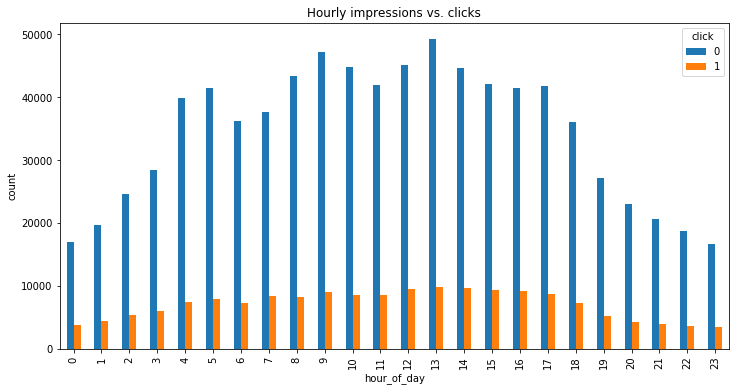

In [12]:
train.groupby(['hour_of_day', 'click']).size().unstack().plot(kind='bar', title="Hour of Day", figsize=(12,6))
plt.ylabel('count')
plt.title('Hourly impressions vs. clicks');

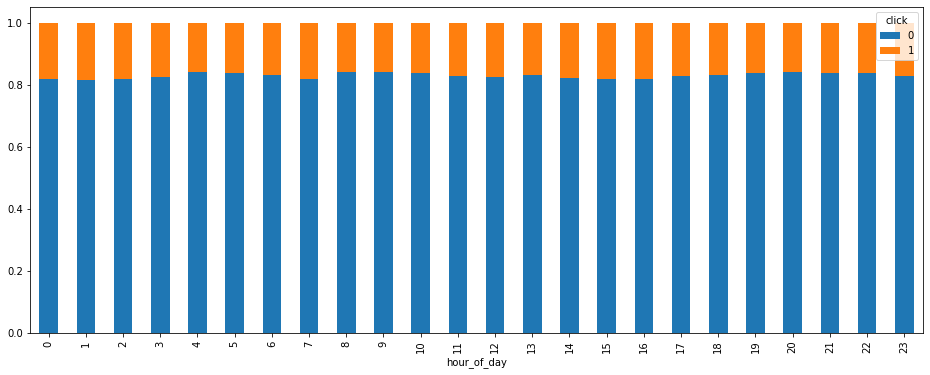

In [13]:
df_t = train.groupby(['hour_of_day', 'click']).size().unstack()
df_t.div(df_t.sum(axis=1),axis=0).plot(kind='bar',stacked=True,figsize=(16,6))

There is nothing shocking here.

In [14]:
train.head(3)

,id,click,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,...,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21,hour_of_day
0,39259272,1,2014-10-21,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,0,15708,320,50,1722,0,35,100084,79,0
1,1922594537,0,2014-10-21,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,0,15701,320,50,1722,0,35,-1,79,0
2,886239130,0,2014-10-21,1005,1,e151e245,7e091613,f028772b,ecad2386,7801e8d9,...,0,17264,320,50,1872,3,39,-1,23,0


Now that we have click and impression. We can calculate Click-through rate (CTR). CTR is the ratio of ad clicks to impressions. It measures the rate of clicks on each ad.

#### Hourly CTR

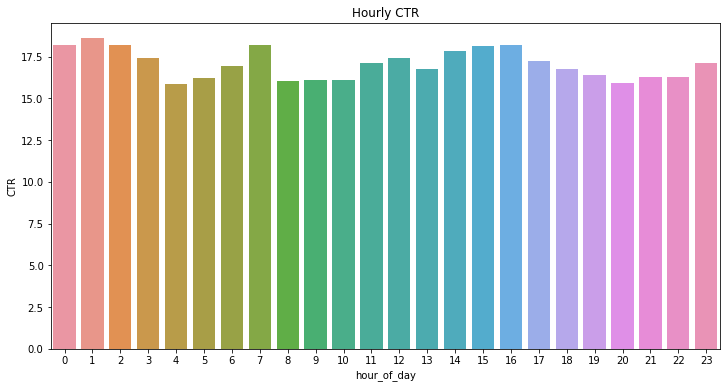

In [15]:
import seaborn as sns

df_click = train[train['click'] == 1]
df_hour = train[['hour_of_day','click']].groupby(['hour_of_day']).count().reset_index()
df_hour = df_hour.rename(columns={'click': 'impressions'})
df_hour['clicks'] = df_click[['hour_of_day','click']].groupby(['hour_of_day']).count().reset_index()['click']
df_hour['CTR'] = df_hour['clicks']/df_hour['impressions']*100

plt.figure(figsize=(12,6))
sns.barplot(y='CTR', x='hour_of_day', data=df_hour)
plt.title('Hourly CTR');

One of the interesting observations here is that the highest CTR happened in the hour of mid-night, 1, 7 and 15. If you remember, around mid-night has the least number of impressions and clicks.

#### Day of week

D:\ProgramData\Anaconda3\envs\normal\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: `weekday_name` is deprecated and will be removed in a future version. Use `day_name` instead
  """Entry point for launching an IPython kernel.


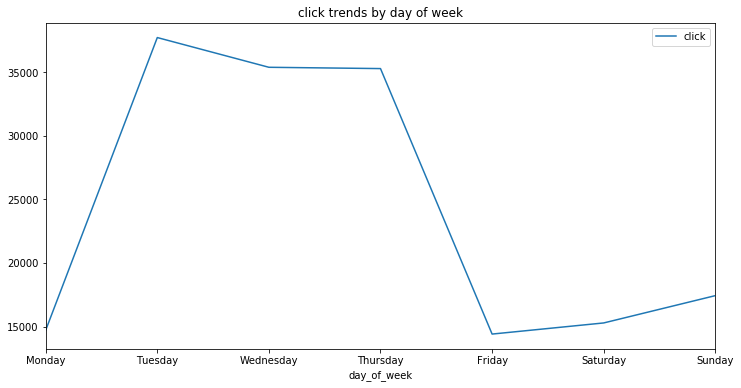

In [16]:
train['day_of_week'] = train['hour'].apply(lambda val: val.weekday_name)
cats = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
train.groupby('day_of_week').agg({'click':'sum'}).reindex(cats).plot(figsize=(12,6))
# ticks = list(range(0, 7, 1)) # points on the x axis where you want the label to appear
# labels = "Mon Tues Weds Thurs Fri Sat Sun".split()
# plt.xticks(ticks, labels)
plt.title('click trends by day of week');

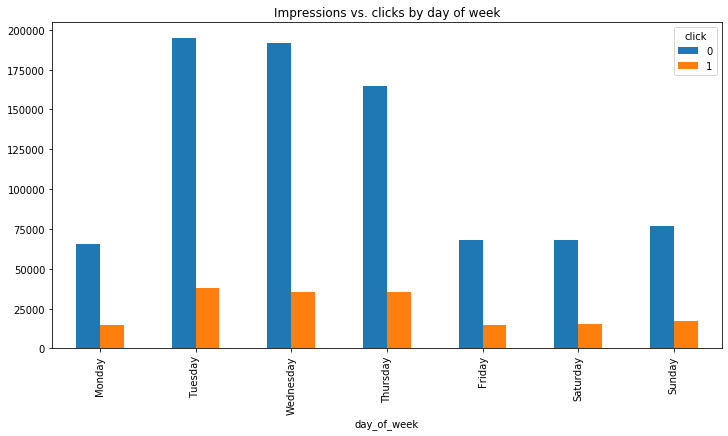

In [17]:
train.groupby(['day_of_week','click']).size().unstack().reindex(cats).plot(kind='bar', title="Day of the Week", figsize=(12,6))
# ticks = list(range(0, 7, 1)) # points on the x axis where you want the label to appear
# labels = "Mon Tues Weds Thurs Fri Sat Sun".split()
# plt.xticks(ticks, labels)
plt.title('Impressions vs. clicks by day of week');

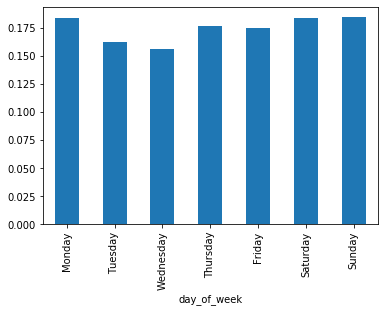

In [18]:
df_t = train.groupby(['day_of_week','click']).size().unstack().reindex(cats)
df_t.div(df_t.sum(axis=1),axis=0)[1].plot(kind='bar',stacked=True)

Tuesdays have the most impressions and clicks, then Wednesdays, followed by Thursdays. Mondays and Fridays have the least number of impressions and clicks.

#### Day of week CTR

In [19]:
train.head(3)

,id,click,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,...,C14,C15,C16,C17,C18,C19,C20,C21,hour_of_day,day_of_week
0,39259272,1,2014-10-21,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,15708,320,50,1722,0,35,100084,79,0,Tuesday
1,1922594537,0,2014-10-21,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,15701,320,50,1722,0,35,-1,79,0,Tuesday
2,886239130,0,2014-10-21,1005,1,e151e245,7e091613,f028772b,ecad2386,7801e8d9,...,17264,320,50,1872,3,39,-1,23,0,Tuesday


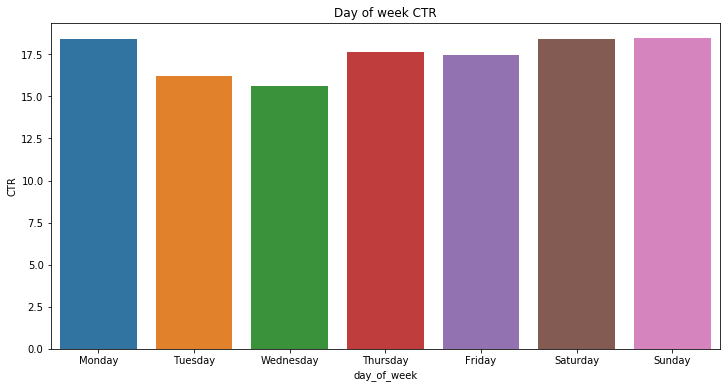

In [20]:
df_click = train[train['click'] == 1]
df_dayofweek = train[['day_of_week','click']].groupby(['day_of_week']).count().reset_index()
df_dayofweek = df_dayofweek.rename(columns={'click': 'impressions'})
df_dayofweek['clicks'] = df_click[['day_of_week','click']].groupby(['day_of_week']).count().reset_index()['click']
df_dayofweek['CTR'] = df_dayofweek['clicks']/df_dayofweek['impressions']*100

plt.figure(figsize=(12,6))
sns.barplot(y='CTR', x='day_of_week', data=df_dayofweek, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Day of week CTR');

While Tuesdays and Wednesdays have the highest number of impressions and clicks, their CTR are among the lowest. Saturdays and Sundays enjoy the highest CTR. Apparently, people have more time to click over the weekend.

In [21]:
train.head(3)

,id,click,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,...,C14,C15,C16,C17,C18,C19,C20,C21,hour_of_day,day_of_week
0,39259272,1,2014-10-21,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,15708,320,50,1722,0,35,100084,79,0,Tuesday
1,1922594537,0,2014-10-21,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,15701,320,50,1722,0,35,-1,79,0,Tuesday
2,886239130,0,2014-10-21,1005,1,e151e245,7e091613,f028772b,ecad2386,7801e8d9,...,17264,320,50,1872,3,39,-1,23,0,Tuesday


### C1 feature

C1 is one of the anonymized categorical features. Although we don't know its meaning, we still want to have a look its distribution.

In [22]:
print(train.C1.value_counts()/len(train))

1005    0.919049
1002    0.054651
1010    0.022324
1012    0.002748
1007    0.000873
1001    0.000242
1008    0.000113
Name: C1, dtype: float64


C1 value = 1005 has the most data, almost 92%. Let's see whether we can find value of C1 indicates something about CTR.

In [23]:
C1_values = train.C1.unique()
C1_values.sort()
ctr_avg_list=[]
for i in C1_values:
    ctr_avg=train.loc[np.where((train.C1 == i))].click.mean()
    ctr_avg_list.append(ctr_avg)
    print("for C1 value: {},  click through rate: {}".format(i,ctr_avg))

for C1 value: 1001,  click through rate: 0.03305785123966942
for C1 value: 1002,  click through rate: 0.21108488408263343
for C1 value: 1005,  click through rate: 0.16981140287405785
for C1 value: 1007,  click through rate: 0.038946162657502864
for C1 value: 1008,  click through rate: 0.09734513274336283
for C1 value: 1010,  click through rate: 0.09630890521411933
for C1 value: 1012,  click through rate: 0.1703056768558952


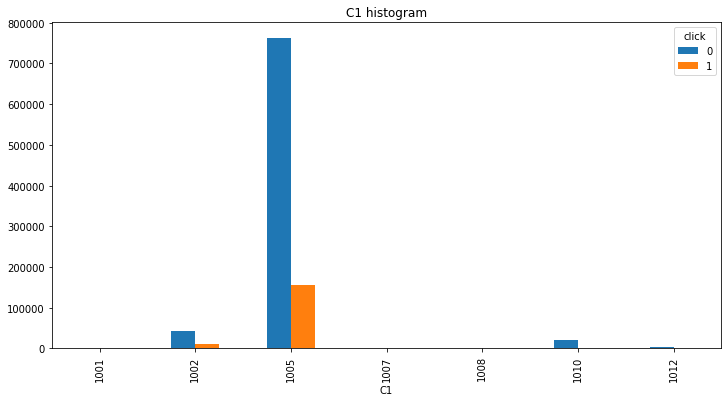

In [24]:
train.groupby(['C1', 'click']).size().unstack().plot(kind='bar', figsize=(12,6), title='C1 histogram');

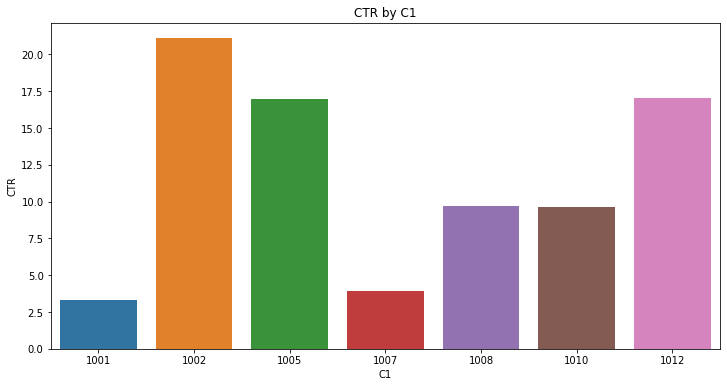

In [25]:
df_c1 = train[['C1','click']].groupby(['C1']).count().reset_index()
df_c1 = df_c1.rename(columns={'click': 'impressions'})
df_c1['clicks'] = df_click[['C1','click']].groupby(['C1']).count().reset_index()['click']
df_c1['CTR'] = df_c1['clicks']/df_c1['impressions']*100

plt.figure(figsize=(12,6))
sns.barplot(y='CTR', x='C1', data=df_c1)
plt.title('CTR by C1');

In [27]:
train['click'].mean()

0.170272

The average CTR in the data is 0.17.

In [28]:
df_c1

,C1,impressions,clicks,CTR
0,1001,242,8,3.305785
1,1002,54651,11536,21.108488
2,1005,919049,156065,16.981140
3,1007,873,34,3.894616
4,1008,113,11,9.734513
5,1010,22324,2150,9.630891
6,1012,2748,468,17.030568


In [29]:
df_c1.CTR.describe()

count     7.000000
mean     11.669429
std       6.884157
min       3.305785
25%       6.762753
50%       9.734513
75%      17.005854
max      21.108488
Name: CTR, dtype: float64

The important C1 values and CTR pairs are:

1005: 92% of the data and 0.17 CTR

1002: 5.5% of the data and 0.21 CTR

1010: 2.3% of the data and 0.096 CTR

1002 has a much higher than average CTR, and 1010 has a much lower than average CTR, it seems these two C1 values are important for predicting CTR.

### Banner position

I have heard that there are many factors that affect the performance of your banner ads, but the most influential one is the banner position. Let's see whether it is true.

In [30]:
print(train.banner_pos.value_counts()/len(train))

0    0.719804
1    0.278516
7    0.001027
2    0.000305
4    0.000179
5    0.000113
3    0.000056
Name: banner_pos, dtype: float64


In [31]:
banner_pos = train.banner_pos.unique()
banner_pos.sort()
ctr_avg_list=[]
for i in banner_pos:
    ctr_avg=train.loc[np.where((train.banner_pos == i))].click.mean()
    ctr_avg_list.append(ctr_avg)
    print("for banner position: {},  click through rate: {}".format(i,ctr_avg))

for banner position: 0,  click through rate: 0.16456979955654594
for banner position: 1,  click through rate: 0.18451363655947953
for banner position: 2,  click through rate: 0.10819672131147541
for banner position: 3,  click through rate: 0.17857142857142858
for banner position: 4,  click through rate: 0.18994413407821228
for banner position: 5,  click through rate: 0.09734513274336283
for banner position: 7,  click through rate: 0.32716650438169426


The important banner positions are:

position 0: 72% of the data and 0.16 CTR

position 1: 28% of the data and 0.18 CTR

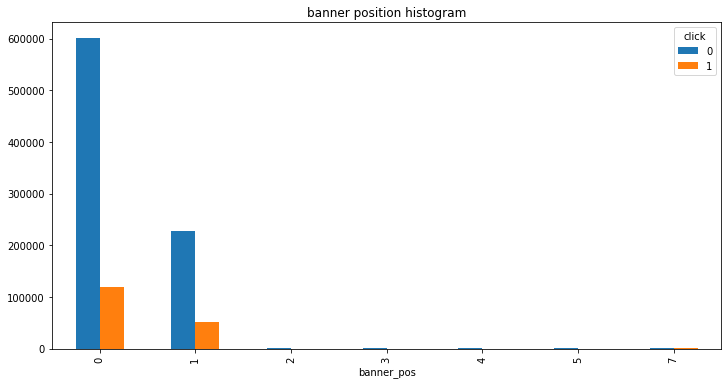

In [32]:
train.groupby(['banner_pos', 'click']).size().unstack().plot(kind='bar', figsize=(12,6), title='banner position histogram');

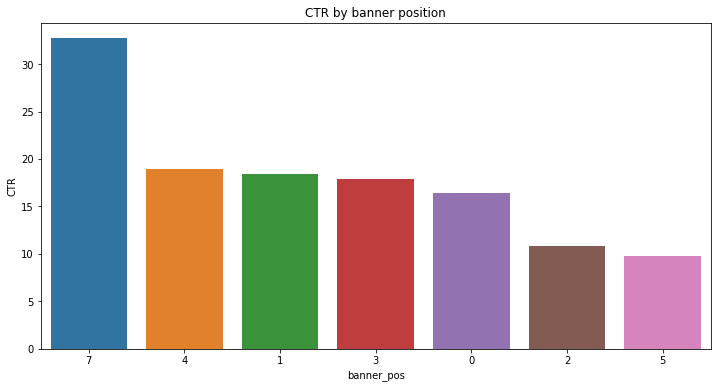

In [33]:
df_banner = train[['banner_pos','click']].groupby(['banner_pos']).count().reset_index()
df_banner = df_banner.rename(columns={'click': 'impressions'})
df_banner['clicks'] = df_click[['banner_pos','click']].groupby(['banner_pos']).count().reset_index()['click']
df_banner['CTR'] = df_banner['clicks']/df_banner['impressions']*100
sort_banners = df_banner.sort_values(by='CTR',ascending=False)['banner_pos'].tolist()
plt.figure(figsize=(12,6))
sns.barplot(y='CTR', x='banner_pos', data=df_banner, order=sort_banners)
plt.title('CTR by banner position');

In [34]:
df_banner.CTR.describe()

count     7.000000
mean     17.861534
std       7.526784
min       9.734513
25%      13.638326
50%      17.857143
75%      18.722889
max      32.716650
Name: CTR, dtype: float64

Although banner position 0 and 1 have the highest number of impressions and clicks, banner 7 enjoys the highest click through rate. Increasing the number of ads placed on banner position 7 seems to be a good idea.

### Site features

#### site id

In [35]:
print("There are {} sites in the data set".format(train.site_id.nunique()))

There are 2629 sites in the data set


In [36]:
print('The top 10 site ids that have the most impressions')
print((train.site_id.value_counts()/len(train))[0:10])

The top 10 site ids that have the most impressions
85f751fd    0.360827
1fbe01fe    0.160684
e151e245    0.065248
d9750ee7    0.023974
5b08c53b    0.022570
5b4d2eda    0.019076
856e6d3f    0.018934
a7853007    0.011329
b7e9786d    0.009172
5ee41ff2    0.008681
Name: site_id, dtype: float64


In [37]:
top10_ids = (train.site_id.value_counts()/len(train))[0:10].index
click_avg_list=[]

for i in top10_ids:
    click_avg=train.loc[np.where((train.site_id == i))].click.mean()
    click_avg_list.append(click_avg)
    print("for site id value: {},  click through rate: {}".format(i,click_avg))

for site id value: 85f751fd,  click through rate: 0.11854434396539061
for site id value: 1fbe01fe,  click through rate: 0.20624330985038958
for site id value: e151e245,  click through rate: 0.29792484060814123
for site id value: d9750ee7,  click through rate: 0.2816801534996246
for site id value: 5b08c53b,  click through rate: 0.4689853788214444
for site id value: 5b4d2eda,  click through rate: 0.1301111344097295
for site id value: 856e6d3f,  click through rate: 0.042991443963240734
for site id value: a7853007,  click through rate: 0.09815517697943331
for site id value: b7e9786d,  click through rate: 0.0759921500218055
for site id value: 5ee41ff2,  click through rate: 0.33498444879622163


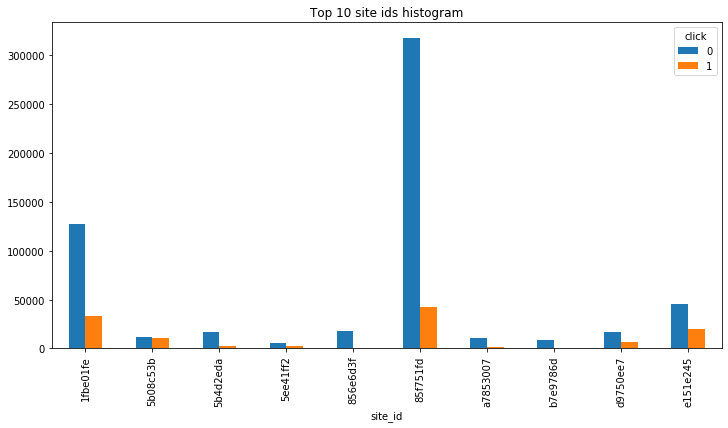

In [38]:
top10_sites = train[(train.site_id.isin((train.site_id.value_counts()/len(train))[0:10].index))]
top10_sites_click = top10_sites[top10_sites['click'] == 1]
top10_sites.groupby(['site_id', 'click']).size().unstack().plot(kind='bar', figsize=(12,6), title='Top 10 site ids histogram');

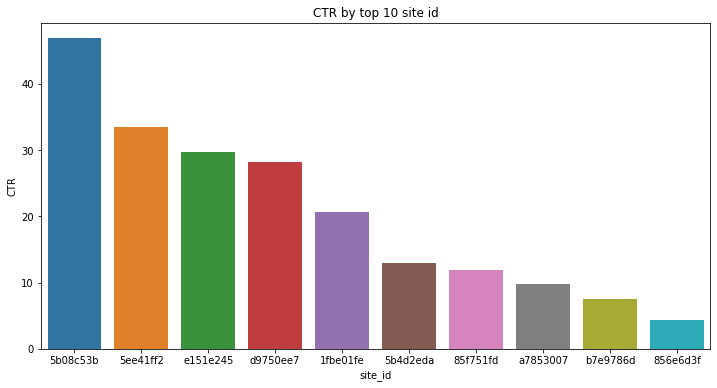

In [39]:
df_site = top10_sites[['site_id','click']].groupby(['site_id']).count().reset_index()
df_site = df_site.rename(columns={'click': 'impressions'})
df_site['clicks'] = top10_sites_click[['site_id','click']].groupby(['site_id']).count().reset_index()['click']
df_site['CTR'] = df_site['clicks']/df_site['impressions']*100
sort_site = df_site.sort_values(by='CTR',ascending=False)['site_id'].tolist()
plt.figure(figsize=(12,6))
sns.barplot(y='CTR', x='site_id', data=df_site, order=sort_site)
plt.title('CTR by top 10 site id');

The site_id feature seems important because the CTR for the top 10 sites, some as high as 0.47, and some as low as 0.04, and they are significantly different from overall CTR 0.16.

#### site domain 

In [40]:
print("There are {} site domains in the data set".format(train.site_domain.nunique()))

There are 2858 site domains in the data set


In [41]:
print('The top 10 site domains that have the most impressions')
print((train.site_domain.value_counts()/len(train))[0:10])

The top 10 site domains that have the most impressions
c4e18dd6    0.373875
f3845767    0.160684
7e091613    0.082076
7687a86e    0.031983
98572c79    0.024768
16a36ef3    0.021226
58a89a43    0.018934
9d54950b    0.009315
b12b9f85    0.009308
17d996e6    0.008774
Name: site_domain, dtype: float64


In [42]:
top10_domains = (train.site_domain.value_counts()/len(train))[0:10].index
click_avg_list=[]

for i in top10_domains:
    click_avg=train.loc[np.where((train.site_domain == i))].click.mean()
    click_avg_list.append(click_avg)
    print("for site domain value: {},  click through rate: {}".format(i,click_avg))

for site domain value: c4e18dd6,  click through rate: 0.12226813774657305
for site domain value: f3845767,  click through rate: 0.20624330985038958
for site domain value: 7e091613,  click through rate: 0.2592231590233442
for site domain value: 7687a86e,  click through rate: 0.4599943720101304
for site domain value: 98572c79,  click through rate: 0.2756782945736434
for site domain value: 16a36ef3,  click through rate: 0.1417601055309526
for site domain value: 58a89a43,  click through rate: 0.042991443963240734
for site domain value: 9d54950b,  click through rate: 0.11121846484165325
for site domain value: b12b9f85,  click through rate: 0.07681564245810056
for site domain value: 17d996e6,  click through rate: 0.3326874857533622


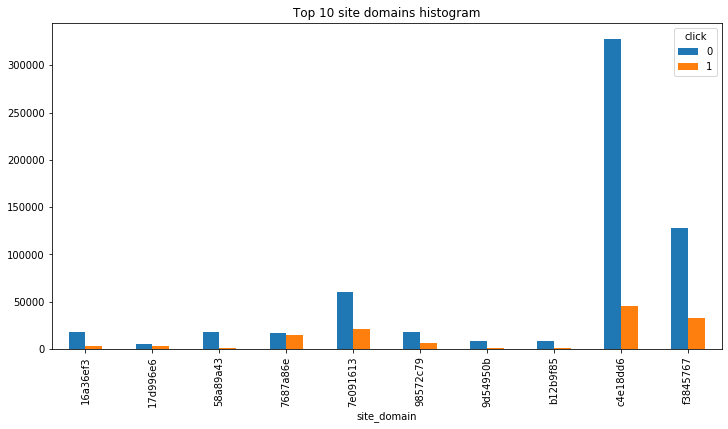

In [43]:
top10_domain = train[(train.site_domain.isin((train.site_domain.value_counts()/len(train))[0:10].index))]
top10_domain_click = top10_domain[top10_domain['click'] == 1]
top10_domain.groupby(['site_domain', 'click']).size().unstack().plot(kind='bar', figsize=(12,6), title='Top 10 site domains histogram');

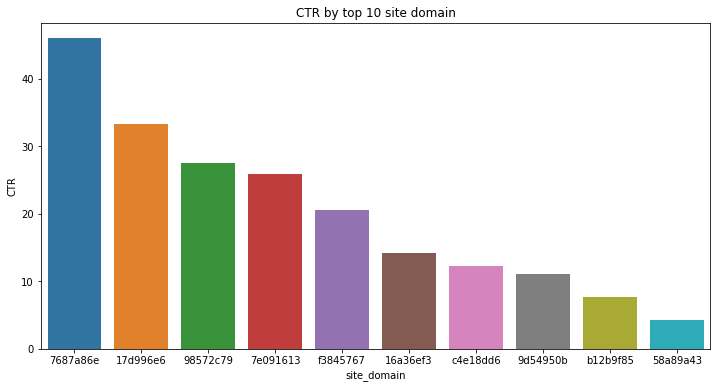

In [44]:
df_domain = top10_domain[['site_domain','click']].groupby(['site_domain']).count().reset_index()
df_domain = df_domain.rename(columns={'click': 'impressions'})
df_domain['clicks'] = top10_domain_click[['site_domain','click']].groupby(['site_domain']).count().reset_index()['click']
df_domain['CTR'] = df_domain['clicks']/df_domain['impressions']*100
sort_domain = df_domain.sort_values(by='CTR',ascending=False)['site_domain'].tolist()
plt.figure(figsize=(12,6))
sns.barplot(y='CTR', x='site_domain', data=df_domain, order=sort_domain)
plt.title('CTR by top 10 site domain');

Similar with the site_id feature, the site_domain feature seems important as well.

#### site category

In [45]:
print("There are {} site categories in the data set".format(train.site_category.nunique()))

There are 20 site categories in the data set


In [46]:
print('The top 10 site categories that have the most impressions')
print((train.site_category.value_counts()/len(train))[0:10])

The top 10 site categories that have the most impressions
50e219e0    0.408706
f028772b    0.313153
28905ebd    0.182850
3e814130    0.075372
f66779e6    0.006167
75fa27f6    0.004026
335d28a8    0.003355
76b2941d    0.002624
c0dd3be3    0.001030
72722551    0.000696
Name: site_category, dtype: float64


In [47]:
top10_categories = (train.site_category.value_counts()/len(train))[0:10].index
click_avg_list=[]

for i in top10_categories:
    click_avg=train.loc[np.where((train.site_category == i))].click.mean()
    click_avg_list.append(click_avg)
    print("for site category value: {},  click through rate: {}".format(i,click_avg))

for site category value: 50e219e0,  click through rate: 0.1283440908623803
for site category value: f028772b,  click through rate: 0.18088602057141398
for site category value: 28905ebd,  click through rate: 0.2085206453377085
for site category value: 3e814130,  click through rate: 0.2835535742716128
for site category value: f66779e6,  click through rate: 0.037619588130371334
for site category value: 75fa27f6,  click through rate: 0.107799304520616
for site category value: 335d28a8,  click through rate: 0.09806259314456035
for site category value: 76b2941d,  click through rate: 0.036966463414634144
for site category value: c0dd3be3,  click through rate: 0.11359223300970873
for site category value: 72722551,  click through rate: 0.0603448275862069


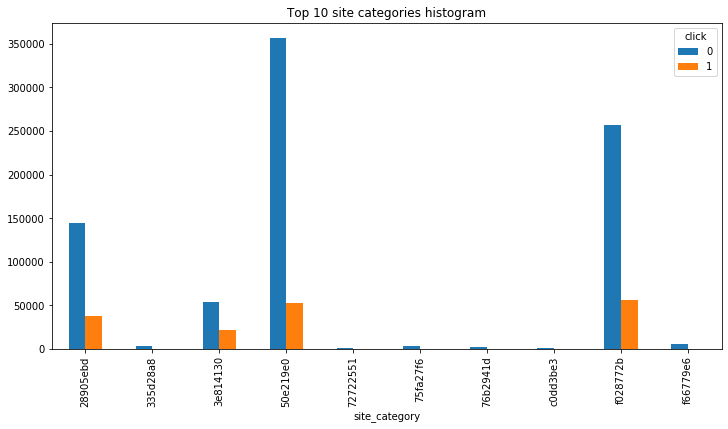

In [48]:
top10_category = train[(train.site_category.isin((train.site_category.value_counts()/len(train))[0:10].index))]
top10_category_click = top10_category[top10_category['click'] == 1]
top10_category.groupby(['site_category', 'click']).size().unstack().plot(kind='bar', figsize=(12,6), title='Top 10 site categories histogram');

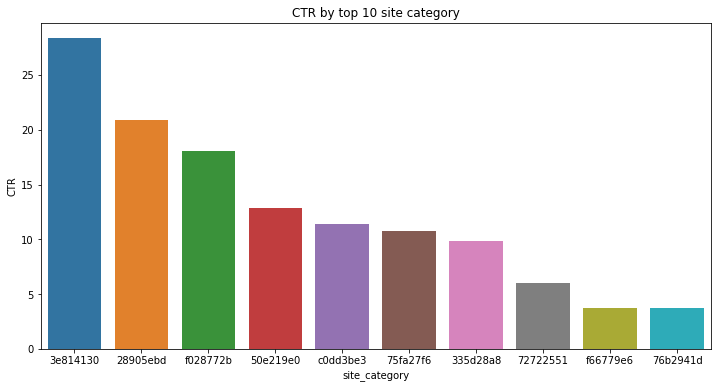

In [49]:
df_category = top10_category[['site_category','click']].groupby(['site_category']).count().reset_index()
df_category = df_category.rename(columns={'click': 'impressions'})
df_category['clicks'] = top10_category_click[['site_category','click']].groupby(['site_category']).count().reset_index()['click']
df_category['CTR'] = df_category['clicks']/df_category['impressions']*100
sort_category = df_category.sort_values(by='CTR',ascending=False)['site_category'].tolist()
plt.figure(figsize=(12,6))
sns.barplot(y='CTR', x='site_category', data=df_category, order=sort_category)
plt.title('CTR by top 10 site category');

### Device features

#### device id

In [50]:
print("There are {} devices in the data set".format(train.device_id.nunique()))

There are 150505 devices in the data set


In [52]:
print('The top 10 devices that have the most impressions')
print((train.device_id.value_counts()/len(train))[0:10])

The top 10 devices that have the most impressions
a99f214a    0.825239
0f7c61dc    0.000548
c357dbff    0.000486
936e92fb    0.000332
afeffc18    0.000216
28dc8687    0.000104
987552d1    0.000098
b09da1c4    0.000090
d857ffbb    0.000090
cef4c8cc    0.000084
Name: device_id, dtype: float64


In [53]:
top10_devices = (train.device_id.value_counts()/len(train))[0:10].index
click_avg_list=[]

for i in top10_devices:
    click_avg=train.loc[np.where((train.device_id == i))].click.mean()
    click_avg_list.append(click_avg)
    print("for device id value: {},  click through rate: {}".format(i,click_avg))

for device id value: a99f214a,  click through rate: 0.17480026998239298
for device id value: 0f7c61dc,  click through rate: 0.7518248175182481
for device id value: c357dbff,  click through rate: 0.6378600823045267
for device id value: 936e92fb,  click through rate: 0.07530120481927711
for device id value: afeffc18,  click through rate: 0.19907407407407407
for device id value: 28dc8687,  click through rate: 0.0
for device id value: 987552d1,  click through rate: 0.0
for device id value: b09da1c4,  click through rate: 0.14444444444444443
for device id value: d857ffbb,  click through rate: 0.23333333333333334
for device id value: cef4c8cc,  click through rate: 0.2976190476190476


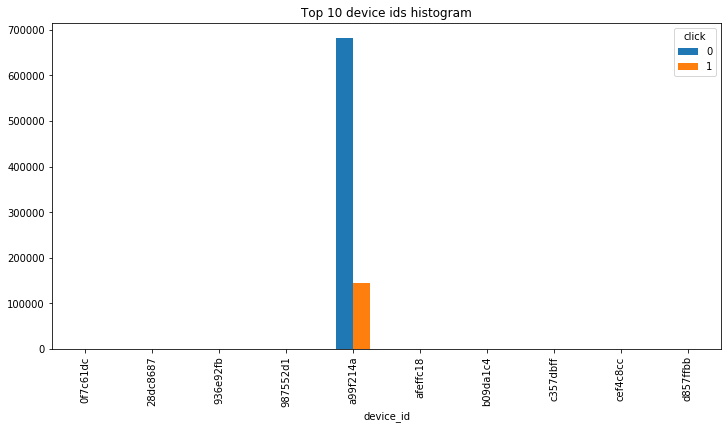

In [54]:
top10_device = train[(train.device_id.isin((train.device_id.value_counts()/len(train))[0:10].index))]
top10_device_click = top10_device[top10_device['click'] == 1]
top10_device.groupby(['device_id', 'click']).size().unstack().plot(kind='bar', figsize=(12,6), title='Top 10 device ids histogram');

You will see that most of device_id is a99f214a : Approx. 83% of the data, and the second major device_id is only 0.05% of the data. And there are some extremely high CTR here with device id at 0f7c61dc.

#### device ip

Device ip is more of a users ip address, so, there are a lot of them.

In [55]:
print("There are {} device ips in the data set".format(train.device_ip.nunique()))
print("There are {} device types in the data set".format(train.device_type.nunique()))
print("There are {} device models in the data set".format(train.device_model.nunique()))
print("There are {} device cnn types in the data set".format(train.device_conn_type.nunique()))

There are 555401 device ips in the data set
There are 4 device types in the data set
There are 5172 device models in the data set
There are 4 device cnn types in the data set


#### device type

In [56]:
print('The impressions by device types')
print((train.device_type.value_counts()/len(train)))

The impressions by device types
1    0.923025
0    0.054651
4    0.019037
5    0.003287
Name: device_type, dtype: float64


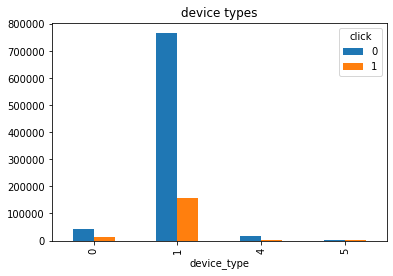

In [57]:
train[['device_type','click']].groupby(['device_type','click']).size().unstack().plot(kind='bar', title='device types');

Device type 1 gets the most impressions and clicks. And the other device types only get the minimum impressions and clicks. We may want to look in more details about device type 1. 

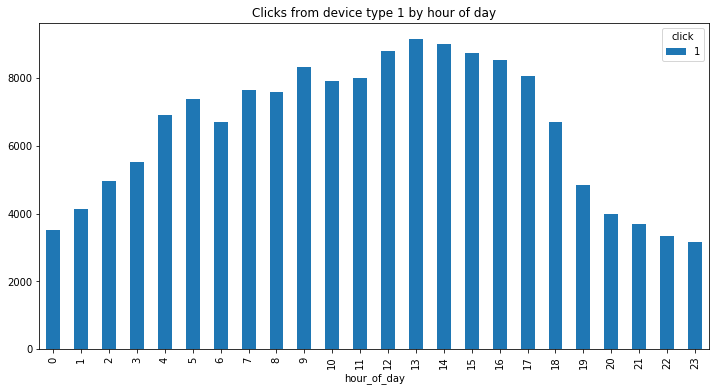

In [58]:
df_click[df_click['device_type']==1].groupby(['hour_of_day', 'click']).size().unstack().plot(kind='bar', title="Clicks from device type 1 by hour of day", figsize=(12,6));

As expected, most clicks happened during the business hours from device type 1. device type is definitely an important feature. 

In [59]:
device_type_click = df_click.groupby('device_type').agg({'click':'sum'}).reset_index()
device_type_impression = train.groupby('device_type').agg({'click':'count'}).reset_index().rename(columns={'click': 'impressions'})
merged_device_type = pd.merge(left = device_type_click , right = device_type_impression, how = 'inner', on = 'device_type')

In [60]:
merged_device_type['CTR'] = merged_device_type['click'] / merged_device_type['impressions']*100

In [61]:
merged_device_type

,device_type,click,impressions,CTR
0,0,11536,54651,21.108488
1,1,156586,923025,16.964438
2,4,1838,19037,9.654883
3,5,312,3287,9.491938


The highest CTR comes from device type 0.

#### app features

In [62]:
print("There are {} apps in the data set".format(train.app_id.nunique()))
print("There are {} app domains in the data set".format(train.app_domain.nunique()))
print("There are {} app categories in the data set".format(train.app_category.nunique()))

There are 3182 apps in the data set
There are 204 app domains in the data set
There are 27 app categories in the data set


Looks like app category something worth to explore.

In [63]:
print('The impressions by app categories')
print((train.app_category.value_counts()/len(train)))

The impressions by app categories
07d7df22    0.647214
0f2161f8    0.236450
cef3e649    0.043231
8ded1f7a    0.036089
f95efa07    0.028075
d1327cf5    0.002962
dc97ec06    0.001380
09481d60    0.001369
75d80bbe    0.000991
fc6fa53d    0.000609
4ce2e9fc    0.000489
879c24eb    0.000326
a3c42688    0.000261
4681bb9d    0.000159
0f9a328c    0.000148
a86a3e89    0.000077
2281a340    0.000064
8df2e842    0.000048
79f0b860    0.000018
0bfbc358    0.000011
a7fd01ec    0.000008
18b1e0be    0.000007
2fc4f2aa    0.000005
5326cf99    0.000004
7113d72a    0.000003
0d82db25    0.000001
4b7ade46    0.000001
Name: app_category, dtype: float64


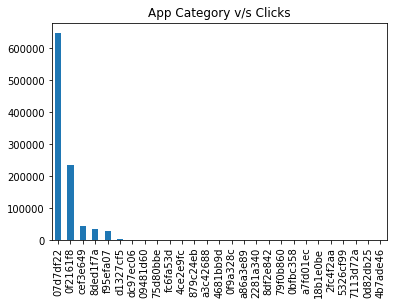

In [64]:
train['app_category'].value_counts().plot(kind='bar', title='App Category v/s Clicks')

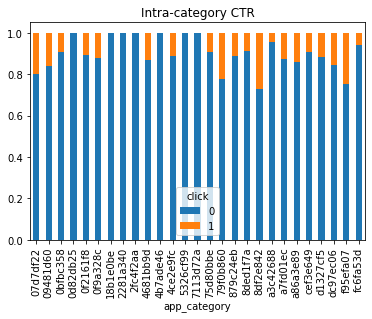

In [65]:
train_app_category = train.groupby(['app_category', 'click']).size().unstack()
train_app_category.div(train_app_category.sum(axis=1), axis=0).plot(kind='bar', stacked=True, title="Intra-category CTR");

#### C14 - C21 features

In [66]:
print("There are {} C14 in the data set".format(train.C14.nunique()))
print("There are {} C15 in the data set".format(train.C15.nunique()))
print("There are {} C16 in the data set".format(train.C16.nunique()))
print("There are {} C17 in the data set".format(train.C17.nunique()))
print("There are {} C18 in the data set".format(train.C18.nunique()))
print("There are {} C19 in the data set".format(train.C19.nunique()))
print("There are {} C20 in the data set".format(train.C20.nunique()))

There are 2243 C14 in the data set
There are 8 C15 in the data set
There are 9 C16 in the data set
There are 422 C17 in the data set
There are 4 C18 in the data set
There are 66 C19 in the data set
There are 163 C20 in the data set


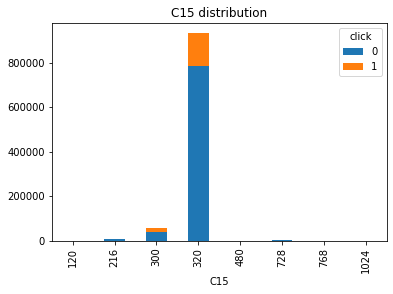

In [67]:
train.groupby(['C15', 'click']).size().unstack().plot(kind='bar', stacked=True, title='C15 distribution');

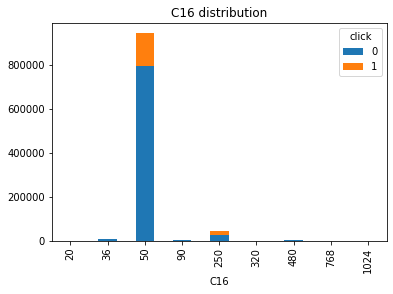

In [68]:
train.groupby(['C16', 'click']).size().unstack().plot(kind='bar', stacked=True, title='C16 distribution');

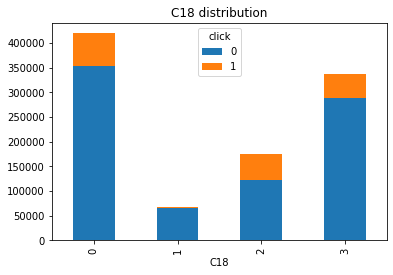

In [69]:
train.groupby(['C18', 'click']).size().unstack().plot(kind='bar', stacked=True, title='C18 distribution');

In [70]:
train.head(3)

,id,click,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,...,C14,C15,C16,C17,C18,C19,C20,C21,hour_of_day,day_of_week
0,39259272,1,2014-10-21,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,15708,320,50,1722,0,35,100084,79,0,Tuesday
1,1922594537,0,2014-10-21,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,15701,320,50,1722,0,35,-1,79,0,Tuesday
2,886239130,0,2014-10-21,1005,1,e151e245,7e091613,f028772b,ecad2386,7801e8d9,...,17264,320,50,1872,3,39,-1,23,0,Tuesday


In [73]:
def convert_obj_to_int(self):
    
    object_list_columns = self.columns
    object_list_dtypes = self.dtypes
    new_col_suffix = '_int'
    for index in range(0,len(object_list_columns)):
        if object_list_dtypes[index] == object :
            self[object_list_columns[index]+new_col_suffix] = self[object_list_columns[index]].map( lambda  x: hash(x))
            self.drop([object_list_columns[index]],inplace=True,axis=1)
    return self
train = convert_obj_to_int(train)

In [74]:
train.head(3)

,id,click,hour,C1,banner_pos,device_type,device_conn_type,C14,C15,C16,...,site_id_int,site_domain_int,site_category_int,app_id_int,app_domain_int,app_category_int,device_id_int,device_ip_int,device_model_int,day_of_week_int
0,39259272,1,2014-10-21,1005,0,1,0,15708,320,50,...,7900982246123141860,6393939178260446907,6950287131457573774,-4129321510112147191,7390053170092303146,-7307295928600074995,7077558665466219939,6779741770598254032,4885804760683188016,1554143300035072433
1,1922594537,0,2014-10-21,1005,0,1,0,15701,320,50,...,7900982246123141860,6393939178260446907,6950287131457573774,-4129321510112147191,7390053170092303146,-7307295928600074995,7077558665466219939,4709304278848808813,7674111876357880999,1554143300035072433
2,886239130,0,2014-10-21,1005,1,1,0,17264,320,50,...,-2106679301317759406,2927157088311766339,3469020091645038403,-4129321510112147191,7390053170092303146,-7307295928600074995,7077558665466219939,-7024138835838488062,7191503395911040114,1554143300035072433


In [75]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 26 columns):
id                   1000000 non-null int32
click                1000000 non-null int32
hour                 1000000 non-null datetime64[ns]
C1                   1000000 non-null int32
banner_pos           1000000 non-null int32
device_type          1000000 non-null int32
device_conn_type     1000000 non-null int32
C14                  1000000 non-null int32
C15                  1000000 non-null int32
C16                  1000000 non-null int32
C17                  1000000 non-null int32
C18                  1000000 non-null int32
C19                  1000000 non-null int32
C20                  1000000 non-null int32
C21                  1000000 non-null int32
hour_of_day          1000000 non-null int64
site_id_int          1000000 non-null int64
site_domain_int      1000000 non-null int64
site_category_int    1000000 non-null int64
app_id_int           1000000 non-null int64

In [77]:
train.drop('hour', axis=1, inplace=True)

In [78]:
train.drop('id', axis=1, inplace=True)

In [87]:
import lightgbm as lgb
X_train = train.loc[:, train.columns != 'click']
y_target = train.click.values
#create lightgbm dataset
msk = np.random.rand(len(X_train)) < 0.8
lgb_train = lgb.Dataset(X_train[msk], y_target[msk])
lgb_eval = lgb.Dataset(X_train[~msk], y_target[~msk], reference=lgb_train)

In [88]:
X_train[:3]

,C1,banner_pos,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,...,site_id_int,site_domain_int,site_category_int,app_id_int,app_domain_int,app_category_int,device_id_int,device_ip_int,device_model_int,day_of_week_int
0,1005,0,1,0,15708,320,50,1722,0,35,...,7900982246123141860,6393939178260446907,6950287131457573774,-4129321510112147191,7390053170092303146,-7307295928600074995,7077558665466219939,6779741770598254032,4885804760683188016,1554143300035072433
1,1005,0,1,0,15701,320,50,1722,0,35,...,7900982246123141860,6393939178260446907,6950287131457573774,-4129321510112147191,7390053170092303146,-7307295928600074995,7077558665466219939,4709304278848808813,7674111876357880999,1554143300035072433
2,1005,1,1,0,17264,320,50,1872,3,39,...,-2106679301317759406,2927157088311766339,3469020091645038403,-4129321510112147191,7390053170092303146,-7307295928600074995,7077558665466219939,-7024138835838488062,7191503395911040114,1554143300035072433


In [93]:
# specify your configurations as a dict
params = {
    'task': 'train',
    'boosting_type': 'gbdt',
    'objective': 'binary',
    'metric': { 'binary_logloss'},
    'num_leaves': 31, # defauly leaves(31) amount for each tree
    'learning_rate': 0.08,
    'feature_fraction': 0.7, # will select 70% features before training each tree
    'bagging_fraction': 0.3, #feature_fraction, but this will random select part of data
    'bagging_freq': 5, #  perform bagging at every 5 iteration
    'verbose': 1
}

print('Start training...')
# train
gbm = lgb.train(params,
                lgb_train,
                num_boost_round=4000,
                valid_sets=lgb_eval,
                early_stopping_rounds=500)

Start training...
[1]	valid_0's binary_logloss: 0.452967
Training until validation scores don't improve for 500 rounds.
[2]	valid_0's binary_logloss: 0.448653
[3]	valid_0's binary_logloss: 0.444891
[4]	valid_0's binary_logloss: 0.441347
[5]	valid_0's binary_logloss: 0.43854
[6]	valid_0's binary_logloss: 0.436049
[7]	valid_0's binary_logloss: 0.433838
[8]	valid_0's binary_logloss: 0.431952
[9]	valid_0's binary_logloss: 0.430271
[10]	valid_0's binary_logloss: 0.428681
[11]	valid_0's binary_logloss: 0.42729
[12]	valid_0's binary_logloss: 0.426023
[13]	valid_0's binary_logloss: 0.424954
[14]	valid_0's binary_logloss: 0.423958
[15]	valid_0's binary_logloss: 0.42305
[16]	valid_0's binary_logloss: 0.422222
[17]	valid_0's binary_logloss: 0.421321
[18]	valid_0's binary_logloss: 0.420611
[19]	valid_0's binary_logloss: 0.419989
[20]	valid_0's binary_logloss: 0.419423
[21]	valid_0's binary_logloss: 0.418892
[22]	valid_0's binary_logloss: 0.418419
[23]	valid_0's binary_logloss: 0.417869
[24]	valid_

[204]	valid_0's binary_logloss: 0.40497
[205]	valid_0's binary_logloss: 0.404948
[206]	valid_0's binary_logloss: 0.404929
[207]	valid_0's binary_logloss: 0.404904
[208]	valid_0's binary_logloss: 0.404894
[209]	valid_0's binary_logloss: 0.404878
[210]	valid_0's binary_logloss: 0.404868
[211]	valid_0's binary_logloss: 0.40485
[212]	valid_0's binary_logloss: 0.40483
[213]	valid_0's binary_logloss: 0.40482
[214]	valid_0's binary_logloss: 0.404787
[215]	valid_0's binary_logloss: 0.404761
[216]	valid_0's binary_logloss: 0.404759
[217]	valid_0's binary_logloss: 0.404728
[218]	valid_0's binary_logloss: 0.404708
[219]	valid_0's binary_logloss: 0.404706
[220]	valid_0's binary_logloss: 0.404703
[221]	valid_0's binary_logloss: 0.40467
[222]	valid_0's binary_logloss: 0.404652
[223]	valid_0's binary_logloss: 0.404627
[224]	valid_0's binary_logloss: 0.404592
[225]	valid_0's binary_logloss: 0.404574
[226]	valid_0's binary_logloss: 0.404541
[227]	valid_0's binary_logloss: 0.404535
[228]	valid_0's binar

[404]	valid_0's binary_logloss: 0.403097
[405]	valid_0's binary_logloss: 0.403089
[406]	valid_0's binary_logloss: 0.403082
[407]	valid_0's binary_logloss: 0.403082
[408]	valid_0's binary_logloss: 0.403086
[409]	valid_0's binary_logloss: 0.403084
[410]	valid_0's binary_logloss: 0.403096
[411]	valid_0's binary_logloss: 0.403091
[412]	valid_0's binary_logloss: 0.403071
[413]	valid_0's binary_logloss: 0.403055
[414]	valid_0's binary_logloss: 0.403048
[415]	valid_0's binary_logloss: 0.403037
[416]	valid_0's binary_logloss: 0.403033
[417]	valid_0's binary_logloss: 0.40303
[418]	valid_0's binary_logloss: 0.403021
[419]	valid_0's binary_logloss: 0.403014
[420]	valid_0's binary_logloss: 0.403022
[421]	valid_0's binary_logloss: 0.403021
[422]	valid_0's binary_logloss: 0.40302
[423]	valid_0's binary_logloss: 0.403024
[424]	valid_0's binary_logloss: 0.403026
[425]	valid_0's binary_logloss: 0.403007
[426]	valid_0's binary_logloss: 0.403008
[427]	valid_0's binary_logloss: 0.403001
[428]	valid_0's bi

[609]	valid_0's binary_logloss: 0.402683
[610]	valid_0's binary_logloss: 0.402685
[611]	valid_0's binary_logloss: 0.402687
[612]	valid_0's binary_logloss: 0.402685
[613]	valid_0's binary_logloss: 0.402684
[614]	valid_0's binary_logloss: 0.402686
[615]	valid_0's binary_logloss: 0.402692
[616]	valid_0's binary_logloss: 0.402686
[617]	valid_0's binary_logloss: 0.402675
[618]	valid_0's binary_logloss: 0.402675
[619]	valid_0's binary_logloss: 0.402659
[620]	valid_0's binary_logloss: 0.402643
[621]	valid_0's binary_logloss: 0.402637
[622]	valid_0's binary_logloss: 0.402629
[623]	valid_0's binary_logloss: 0.402628
[624]	valid_0's binary_logloss: 0.40262
[625]	valid_0's binary_logloss: 0.402627
[626]	valid_0's binary_logloss: 0.402623
[627]	valid_0's binary_logloss: 0.402619
[628]	valid_0's binary_logloss: 0.402612
[629]	valid_0's binary_logloss: 0.402611
[630]	valid_0's binary_logloss: 0.402609
[631]	valid_0's binary_logloss: 0.402614
[632]	valid_0's binary_logloss: 0.402615
[633]	valid_0's b

[811]	valid_0's binary_logloss: 0.40241
[812]	valid_0's binary_logloss: 0.402413
[813]	valid_0's binary_logloss: 0.402417
[814]	valid_0's binary_logloss: 0.402427
[815]	valid_0's binary_logloss: 0.402432
[816]	valid_0's binary_logloss: 0.402436
[817]	valid_0's binary_logloss: 0.40244
[818]	valid_0's binary_logloss: 0.402448
[819]	valid_0's binary_logloss: 0.402454
[820]	valid_0's binary_logloss: 0.40246
[821]	valid_0's binary_logloss: 0.402469
[822]	valid_0's binary_logloss: 0.402456
[823]	valid_0's binary_logloss: 0.402455
[824]	valid_0's binary_logloss: 0.402451
[825]	valid_0's binary_logloss: 0.402458
[826]	valid_0's binary_logloss: 0.402454
[827]	valid_0's binary_logloss: 0.402459
[828]	valid_0's binary_logloss: 0.402454
[829]	valid_0's binary_logloss: 0.402455
[830]	valid_0's binary_logloss: 0.402461
[831]	valid_0's binary_logloss: 0.40247
[832]	valid_0's binary_logloss: 0.402468
[833]	valid_0's binary_logloss: 0.402466
[834]	valid_0's binary_logloss: 0.402465
[835]	valid_0's bina

[1021]	valid_0's binary_logloss: 0.402337
[1022]	valid_0's binary_logloss: 0.402335
[1023]	valid_0's binary_logloss: 0.402337
[1024]	valid_0's binary_logloss: 0.402328
[1025]	valid_0's binary_logloss: 0.402327
[1026]	valid_0's binary_logloss: 0.402329
[1027]	valid_0's binary_logloss: 0.402325
[1028]	valid_0's binary_logloss: 0.402333
[1029]	valid_0's binary_logloss: 0.402327
[1030]	valid_0's binary_logloss: 0.402334
[1031]	valid_0's binary_logloss: 0.402337
[1032]	valid_0's binary_logloss: 0.402327
[1033]	valid_0's binary_logloss: 0.402329
[1034]	valid_0's binary_logloss: 0.402329
[1035]	valid_0's binary_logloss: 0.402327
[1036]	valid_0's binary_logloss: 0.402332
[1037]	valid_0's binary_logloss: 0.402327
[1038]	valid_0's binary_logloss: 0.402322
[1039]	valid_0's binary_logloss: 0.402325
[1040]	valid_0's binary_logloss: 0.402321
[1041]	valid_0's binary_logloss: 0.40232
[1042]	valid_0's binary_logloss: 0.402327
[1043]	valid_0's binary_logloss: 0.402324
[1044]	valid_0's binary_logloss: 0.

[1222]	valid_0's binary_logloss: 0.402502
[1223]	valid_0's binary_logloss: 0.402502
[1224]	valid_0's binary_logloss: 0.402503
[1225]	valid_0's binary_logloss: 0.402504
[1226]	valid_0's binary_logloss: 0.402494
[1227]	valid_0's binary_logloss: 0.402482
[1228]	valid_0's binary_logloss: 0.402486
[1229]	valid_0's binary_logloss: 0.402475
[1230]	valid_0's binary_logloss: 0.402475
[1231]	valid_0's binary_logloss: 0.402484
[1232]	valid_0's binary_logloss: 0.402488
[1233]	valid_0's binary_logloss: 0.402486
[1234]	valid_0's binary_logloss: 0.402496
[1235]	valid_0's binary_logloss: 0.402506
[1236]	valid_0's binary_logloss: 0.402497
[1237]	valid_0's binary_logloss: 0.402496
[1238]	valid_0's binary_logloss: 0.402498
[1239]	valid_0's binary_logloss: 0.402497
[1240]	valid_0's binary_logloss: 0.402501
[1241]	valid_0's binary_logloss: 0.402495
[1242]	valid_0's binary_logloss: 0.402498
[1243]	valid_0's binary_logloss: 0.40249
[1244]	valid_0's binary_logloss: 0.402492
[1245]	valid_0's binary_logloss: 0.

[1420]	valid_0's binary_logloss: 0.402797
[1421]	valid_0's binary_logloss: 0.402799
[1422]	valid_0's binary_logloss: 0.402803
[1423]	valid_0's binary_logloss: 0.402804
[1424]	valid_0's binary_logloss: 0.402812
[1425]	valid_0's binary_logloss: 0.402803
[1426]	valid_0's binary_logloss: 0.402805
[1427]	valid_0's binary_logloss: 0.402805
[1428]	valid_0's binary_logloss: 0.402812
[1429]	valid_0's binary_logloss: 0.402813
[1430]	valid_0's binary_logloss: 0.402818
[1431]	valid_0's binary_logloss: 0.402816
[1432]	valid_0's binary_logloss: 0.402818
[1433]	valid_0's binary_logloss: 0.402823
[1434]	valid_0's binary_logloss: 0.402825
[1435]	valid_0's binary_logloss: 0.402836
[1436]	valid_0's binary_logloss: 0.402838
[1437]	valid_0's binary_logloss: 0.402843
[1438]	valid_0's binary_logloss: 0.402853
[1439]	valid_0's binary_logloss: 0.402851
[1440]	valid_0's binary_logloss: 0.402856
[1441]	valid_0's binary_logloss: 0.402859
[1442]	valid_0's binary_logloss: 0.402853
[1443]	valid_0's binary_logloss: 0

In [94]:
print(gbm.best_score)
print(gbm.best_iteration)

defaultdict(<class 'dict'>, {'valid_0': {'binary_logloss': 0.40230250045617816}})
1085


In [108]:
from operator import itemgetter
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import roc_auc_score

def run_default_test(train, features, target, random_state=0):
    eta = 0.1
    max_depth = 5
    subsample = 0.8
    colsample_bytree = 0.8
    print('XGBoost params. ETA: {}, MAX_DEPTH: {}, SUBSAMPLE: {}, COLSAMPLE_BY_TREE: {}'.format(eta, max_depth, subsample, colsample_bytree))
    params = {
        "objective": "binary:logistic",
        "booster" : "gbtree",
        "eval_metric": "logloss",
        "eta": eta,
        "max_depth": max_depth,
        "subsample": subsample,
        "colsample_bytree": colsample_bytree,
        "silent": 1,
        "seed": random_state
    }
    num_boost_round = 260
    early_stopping_rounds = 20
    test_size = 0.2

    X_train, X_valid = train_test_split(train, test_size=test_size, random_state=random_state)
    y_train = X_train[target]
    y_valid = X_valid[target]
    dtrain = xgb.DMatrix(X_train[features], y_train)
    dvalid = xgb.DMatrix(X_valid[features], y_valid)
    watchlist = [(dtrain, 'train'), (dvalid, 'eval')]
    gbm = xgb.train(params, dtrain, num_boost_round, evals=watchlist, early_stopping_rounds=early_stopping_rounds, verbose_eval=True)
    print(gbm.best_score)
    print(gbm.best_iteration)

In [109]:
features = ['C1', 'banner_pos', 'device_type', 'device_conn_type', 'C14',
       'C15', 'C16', 'C17', 'C18', 'C19', 'C20', 'C21', 'hour_of_day',
       'site_id_int', 'site_domain_int', 'site_category_int', 'app_id_int',
       'app_domain_int', 'app_category_int', 'device_id_int', 'device_ip_int',
       'device_model_int', 'day_of_week_int']
run_default_test(train, features, 'click')

XGBoost params. ETA: 0.1, MAX_DEPTH: 5, SUBSAMPLE: 0.8, COLSAMPLE_BY_TREE: 0.8


D:\ProgramData\Anaconda3\envs\normal\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
D:\ProgramData\Anaconda3\envs\normal\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[0]	train-logloss:0.648603	eval-logloss:0.648551
Multiple eval metrics have been passed: 'eval-logloss' will be used for early stopping.

Will train until eval-logloss hasn't improved in 20 rounds.
[1]	train-logloss:0.61216	eval-logloss:0.612064
[2]	train-logloss:0.582141	eval-logloss:0.581998
[3]	train-logloss:0.55721	eval-logloss:0.55704
[4]	train-logloss:0.536332	eval-logloss:0.536146
[5]	train-logloss:0.518734	eval-logloss:0.51853
[6]	train-logloss:0.503746	eval-logloss:0.503533
[7]	train-logloss:0.49126	eval-logloss:0.491023
[8]	train-logloss:0.480528	eval-logloss:0.480293
[9]	train-logloss:0.47136	eval-logloss:0.471123
[10]	train-logloss:0.463472	eval-logloss:0.463252
[11]	train-logloss:0.456843	eval-logloss:0.456619
[12]	train-logloss:0.451203	eval-logloss:0.45099
[13]	train-logloss:0.446228	eval-logloss:0.446032
[14]	train-logloss:0.44211	eval-logloss:0.441933
[15]	train-logloss:0.438442	eval-logloss:0.438287
[16]	train-logloss:0.43544	eval-logloss:0.435294
[17]	train-logloss:0

[161]	train-logloss:0.403017	eval-logloss:0.405026
[162]	train-logloss:0.402929	eval-logloss:0.404937
[163]	train-logloss:0.4029	eval-logloss:0.404912
[164]	train-logloss:0.402881	eval-logloss:0.404905
[165]	train-logloss:0.402836	eval-logloss:0.404879
[166]	train-logloss:0.402792	eval-logloss:0.404851
[167]	train-logloss:0.40272	eval-logloss:0.404791
[168]	train-logloss:0.402694	eval-logloss:0.404776
[169]	train-logloss:0.402679	eval-logloss:0.404769
[170]	train-logloss:0.402627	eval-logloss:0.40474
[171]	train-logloss:0.402556	eval-logloss:0.404687
[172]	train-logloss:0.40253	eval-logloss:0.404661
[173]	train-logloss:0.402488	eval-logloss:0.404645
[174]	train-logloss:0.402445	eval-logloss:0.404623
[175]	train-logloss:0.402371	eval-logloss:0.404566
[176]	train-logloss:0.402323	eval-logloss:0.404537
[177]	train-logloss:0.402305	eval-logloss:0.404539
[178]	train-logloss:0.402217	eval-logloss:0.40446
[179]	train-logloss:0.402189	eval-logloss:0.404442
[180]	train-logloss:0.402107	eval-log